In [2]:
import tensorflow as tf

#https://www.youtube.com/watch?v=wQ8BIBpya2k

import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

mnist = tf.keras.datasets.mnist #get the dataset of handwritten digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#normalize the data as it is is displayed in integers from 0-255, to make it numbers between 0-1
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

#create feed forward model -> sequential
model = tf.keras.models.Sequential()

#adding the layers of the model
#input layer
model.add(tf.keras.layers.Flatten())
#hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

#compile the model, specify the attributes
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
metrics = ["accuracy"])

#fit the model
model.fit(x_train, y_train)


2021-11-20 11:10:14.777345: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.2617 - accuracy: 0.9223


In [3]:
val_loss, vall_acc = model.evaluate(x_test, y_test)

print(val_loss, vall_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1293 - accuracy: 0.9602
0.12926186621189117 0.9602000117301941


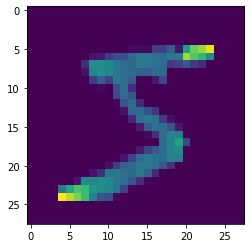

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])

plt.show()

In [5]:
model.save("epic_numbers")

new_model = tf.keras.models.load_model("epic_numbers")

predictions = new_model.predict([x_test])

print(predictions)

2021-11-20 11:10:26.815192: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: epic_numbers/assets
[[1.27531598e-06 1.89045636e-06 2.44007635e-04 ... 9.99102592e-01
  1.18250600e-05 4.61877426e-05]
 [9.96384097e-06 3.29880335e-04 9.96732593e-01 ... 3.70322510e-08
  1.07295506e-04 3.02589176e-09]
 [5.86954627e-07 9.97955203e-01 8.47069823e-05 ... 8.95560777e-04
  6.27139991e-04 2.41658126e-05]
 ...
 [1.14784916e-06 1.08346940e-05 5.40784731e-06 ... 3.93478607e-04
  3.31821124e-04 7.60286395e-03]
 [3.87022419e-06 2.13073963e-05 1.52429806e-07 ... 8.13659653e-07
  8.05258984e-04 4.77301057e-07]
 [5.09662437e-04 6.56845486e-07 1.42116551e-04 ... 7.83728069e-08
  4.35550692e-06 1.73394312e-07]]


In [6]:
import numpy as np

#give a visualization of whether the prediction worked
print(np.argmax(predictions[0]))

7


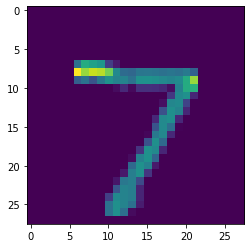

In [7]:
plt.imshow(x_test[0])
#print the handwritten number that was predicted to be 7
plt.show()